# General Comments about the data set
This table provides the volume of violent crime (murder and nonnegligent manslaughter, rape, robbery, and aggravated assault) and property crime (burglary, larceny-theft, and motor vehicle theft) as reported by city and town law enforcement agencies (listed alphabetically by state) that contributed data to the UCR Program. (Note:  Arson is not included in the property crime total in this table; however, if complete arson data were provided, they will appear in the arson column.)

Population estimation
For the 2013 population estimates used in this table, the FBI computed individual rates of growth from one year to the next for every city/town and county using 2010 decennial population counts and 2011 through 2012 population estimates from the U.S. Census Bureau. Each agency’s rates of growth were averaged; that average was then applied and added to its 2012 Census population estimate to derive the agency’s 2013 population estimate.

 

# Instructions

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

Vanilla logistic regression
Ridge logistic regression
Lasso logistic regression

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

In [1]:
# import all the modules I need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
%matplotlib inline
import seaborn as sns
import math
from sklearn import linear_model
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy",
                        message="^internal gelsd")


# import in the data table I downloaded from UCR
df = pd.DataFrame()
df = pd.read_excel(
    "table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", sheet_name='13tbl8ny')

Need to clean by:
- fixing headers (line 3) and deleting rows 0-2
- dropping Rape\n(revised\ndefinition)1 column 
- filling in NaN with 0


Need to create features by:
- changing categorical variables to 0 and 1

In [2]:
df.drop(['Unnamed: 4', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

In [3]:
df.columns = df.loc[3].values

In [4]:
df.drop([0, 1,2, 3, 352, 353, 354], inplace=True)

In [5]:
# rename and change the data type to be numerical instead of an object
df['Population'] = df['Population'].astype(int)

df['Violent_crime'] = df['Violent\ncrime']
df['Violent_crime'] = df['Violent_crime'].astype(int)
df['Violent_crime'] = df['Violent_crime'].apply(lambda x: (x > 0)*1)

df['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df['Murder'] = df['Murder'].astype(
    int)
df['Murder01'] = df['Murder'].apply(
    lambda x: (x > 0)*1)

df['Rape'] = df['Rape\n(legacy\ndefinition)2']
df['Rape'] = df['Rape'].astype(int)
df['Rape'] = df['Rape'].apply(lambda x: (x > 0)*1)

df['Robbery'] = df['Robbery'].astype(int)
df['Robbery'] = df['Robbery'].apply(lambda x: (x > 0)*1)

df['Aggravated_assault'] = df['Aggravated\nassault']
df['Aggravated_assault'] = df['Aggravated_assault'].astype(int)
df['Aggravated_assault'] = df['Aggravated_assault'].apply(lambda x: (x > 0)*1)

df['Property\ncrime'] = df['Property\ncrime'].astype(int)
df['Property_crime'] = df['Property\ncrime']
df['Property_crime'] = df['Property_crime'].apply(lambda x: (x > 0)*1)

df['Burglary'] = df['Burglary'].astype(int)
df['Burglary'] = df['Burglary'].apply(lambda x: (x > 0)*1)

df2 = df.drop(['Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter',
               'Rape\n(legacy\ndefinition)2',  'Aggravated\nassault', 'Property\ncrime'], axis=1, inplace=True)
df

,City,Population,Robbery,Burglary,Violent_crime,Murder,Murder01,Rape,Aggravated_assault,Property_crime
4,Adams Village,1861,0,1,0,0,0,0,0,1
5,Addison Town and Village,2577,0,1,1,0,0,0,1,1
6,Akron Village,2846,0,1,1,0,0,0,1,1
7,Albany,97956,1,1,1,8,1,1,1,1
8,Albion Village,6388,1,1,1,0,0,1,1,1
9,Alfred Village,4089,1,1,1,0,0,0,1,1
10,Allegany Village,1781,0,0,1,0,0,0,1,1
11,Amherst Town,118296,1,1,1,1,1,1,1,1
12,Amityville Village,9519,1,1,1,0,0,1,1,1
13,Amsterdam,18182,1,1,1,0,0,0,1,1


In [6]:
#Linear Regression Model
regr = linear_model.LinearRegression()
regr.fit(df[['Population', 'Murder01', 'Robbery', 'Violent_crime', 'Rape', 'Aggravated_assault']], df['Property_crime'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
regr.coef_

array([ 1.43716055e-10, -2.78042663e-05, -7.83940914e-07,  1.17648938e-01,
       -3.77510172e-06, -1.22740842e-06])

In [8]:
regr.score(df[['Population', 'Murder01', 'Robbery', 'Violent_crime', 'Rape', 'Aggravated_assault']], df['Property_crime'])

0.10216742215350405

In [9]:
regr = linear_model.LinearRegression()
X =df[['Population', 'Murder01', 'Robbery', 'Violent_crime', 'Rape', 'Aggravated_assault']].values
N = np.random.randn(X.shape[0], 10)
X = np.concatenate((X, N), axis=1)
regr.fit(X, df['Property_crime'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
regr.score(X, df['Property_crime'])

0.10955313372747988

Now, let's use the new linear regression code that I learned in this lesson to refit the model and check params, pvalues, and the rsquared value for NY

In [11]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [12]:
# Re-fit the model here.
linear_formula = 'Property_crime ~ Population + Murder01'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
print(lm.params)
print(lm.pvalues)
print(lm.rsquared)
print(lm.conf_int())

data = df[['Population'] + ['Murder01']]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['Property_crime'], df['Murder01']))

Intercept    0.980
Population   0.000
Murder01     0.020
dtype: float64
Intercept    0.000
Population   0.959
Murder01     0.330
dtype: float64
0.0028827290976437547
                0     1
Intercept   0.965 0.995
Population -0.000 0.000
Murder01   -0.020 0.060
[[  6   0]
 [293  49]]


Now, let's make a KNN model:

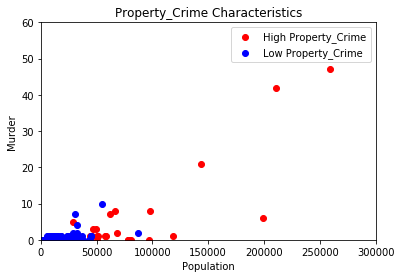

In [13]:
# Look at our data.
plt.scatter(
    df[df['Property_crime'] >= 1000].Population,
    df[df['Property_crime'] >= 1000].Murder,
    color='red'
)
plt.scatter(
    df[df['Property_crime'] <= 1000].Population,
    df[df['Property_crime'] <= 1000].Murder,
    color='blue'
)
plt.xlim(left = 0, right=300000)
plt.ylim(ymin=0, ymax=60)
plt.legend(['High Property_Crime', 'Low Property_Crime'])
plt.title('Property_Crime Characteristics')
plt.xlabel('Population')
plt.ylabel('Murder')
plt.show()

# Vanilla Logistic

In [13]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [14]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
y = df['Property_crime']
X = df[['Population', 'Murder']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by Property_crime status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[1.68214424e-03 5.79418416e-09]]
[5.71108874e-07]

 Accuracy by Property_crime status
Property_crime  0    1
row_0                 
1               6  342

 Percentage accuracy
0.9827586206896551


# Ridge Regression

In [46]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['Property_crime'].values.reshape(-1, 1)
X_train = df_train.iloc[ : , 1:9]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)


R-squared simple model:
1.0


In [48]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

0.0
[ 5.76202839e-07  2.97391077e-03  6.60951156e-01  2.53866609e-01
 -3.01508057e-03 -1.08500809e-02 -1.20059818e-02  9.41980215e-02]


In [57]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['Property_crime'].values.reshape(-1, 1)
X_test = df_test.iloc[ : , 1:9]
print('\nR-squared simple model:')
print(regr1.score(X_test, Y_test))


R-squared simple model:
-0.035714285714285365


# Lasso Regression

In [58]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
newparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(newparams)

R² for the model with few features:
1.0

Parameter estimates for the model with few features:
[0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [59]:
print(lass.score(X_test, Y_test))

-0.035714285714285365
